In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/athlete_events.csv')
regions=pd.read_csv('/content/drive/MyDrive/noc_regions.csv')

In [ ]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data['Medal'].fillna('DNW',inplace=True ) #did not win

In [ ]:
print(data.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [ ]:
print(data.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


In [ ]:
regions.drop('notes',axis=1,inplace=True )

In [ ]:
regions.rename(columns={'region':'Country'},inplace=True)

In [ ]:
data_merge=data.merge(regions,left_on='NOC',right_on='NOC',how='left')

In [ ]:
data_merge.loc[data_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [ ]:
# Replace missing Teams by the values above.
#data_merge.loc[data_merge['Country'].isnull(), ['Country']] = data_merge['Team']

data_merge['Country'] = np.where(data_merge['NOC']=='SGP', 'Singapore', data_merge['Country'])
data_merge['Country'] = np.where(data_merge['NOC']=='ROT', 'Refugee Olympic Athletes', data_merge['Country'])
data_merge['Country'] = np.where(data_merge['NOC']=='UNK', 'Unknown', data_merge['Country'])
data_merge['Country'] = np.where(data_merge['NOC']=='TUV', 'Tuvalu', data_merge['Country'])



In [ ]:
summer = data_merge[data_merge.Season=='Summer']

In [ ]:
athletics = summer[summer.Sport=='Athletics']
athletics.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,DNW,Netherlands
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,DNW,Netherlands
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,DNW,Estonia
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,DNW,Norway


In [ ]:
shotput = athletics[athletics.Event=="Athletics Men's Shot Put"]
shotput.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland
984,554,Benik Abramyan,M,31.0,186.0,115.0,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Shot Put,DNW,Georgia
1216,684,Ahmed Mohamed Achouche,M,28.0,191.0,110.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Shot Put,DNW,Egypt
1217,684,Ahmed Mohamed Achouche,M,32.0,191.0,110.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Shot Put,DNW,Egypt
2308,1284,Jess Aguirre Delgado,M,NaN,175.0,NaN,Mexico,MEX,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Shot Put,DNW,Mexico


<Axes: >

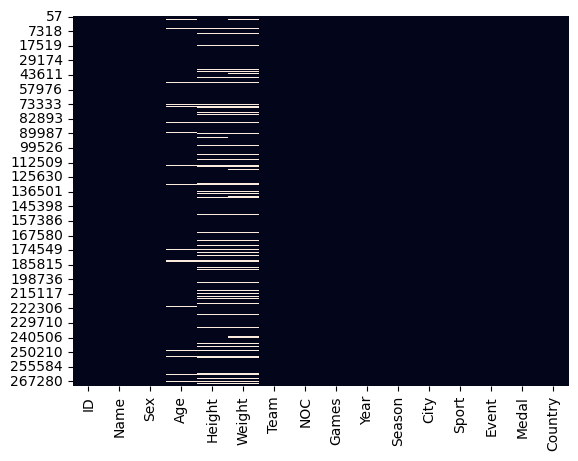

In [ ]:
sns.heatmap(shotput.isnull(), cbar=False)

Data Cleaning

In [ ]:
spHeight = pd.DataFrame(shotput['Height']) # Response
spWeight = pd.DataFrame(shotput['Weight']) # Predictor

medSpHeight = spHeight.median()
medSpWeight = spWeight.median()

print(medSpHeight)
print(medSpWeight)

shotput['Height'].fillna(medSpHeight[0],inplace=True )
shotput['Weight'].fillna(medSpWeight[0],inplace=True )
shotput.head(5)

Height    190.0
dtype: float64
Weight    118.0
dtype: float64


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland
984,554,Benik Abramyan,M,31.0,186.0,115.0,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Shot Put,DNW,Georgia
1216,684,Ahmed Mohamed Achouche,M,28.0,191.0,110.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Shot Put,DNW,Egypt
1217,684,Ahmed Mohamed Achouche,M,32.0,191.0,110.0,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Shot Put,DNW,Egypt
2308,1284,Jess Aguirre Delgado,M,NaN,175.0,118.0,Mexico,MEX,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Shot Put,DNW,Mexico


In [ ]:
spAge = pd.DataFrame(shotput['Age']) 
medSpAge = spAge.median()
shotput['Age'].fillna(medSpAge[0],inplace=True )

<Axes: >

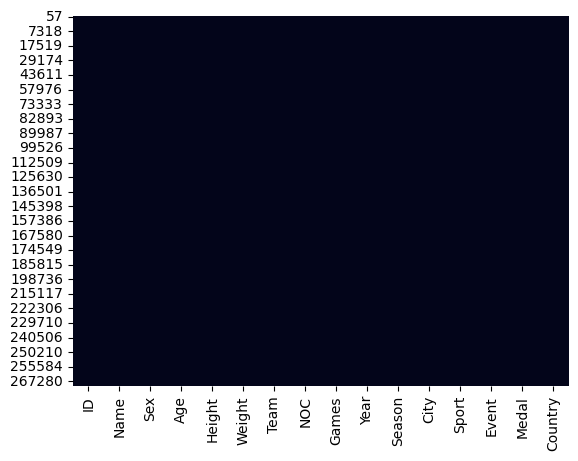

In [ ]:
sns.heatmap(shotput.isnull(), cbar=False)

In [ ]:
spWeight = pd.DataFrame(shotput['Weight']) # Response
spHeight = pd.DataFrame(shotput['Height']) # Predictor

In [ ]:

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
spHeight_train, spHeight_test, spWeight_train, spWeight_test = train_test_split(spHeight, spWeight, test_size = 0.1)

# Check the sample sizes
print("Train Set :", spHeight_train.shape, spWeight_train.shape)
print("Test Set  :", spHeight_test.shape, spWeight_test.shape)

Train Set : (615, 1) (615, 1)
Test Set  : (69, 1) (69, 1)


In [ ]:
spHeight_train.describe()

,Height
count,615.000000
mean,189.848780
std,6.033152
min,159.000000
25%,186.000000
50%,190.000000
75%,193.000000
max,208.000000


In [ ]:
spWeight_train.describe()

,Weight
count,615.000000
mean,116.066667
std,16.922932
min,56.000000
25%,106.000000
50%,118.000000
75%,125.000000
max,165.000000


<ipython-input-27-02ebe6f23d4f>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-27-02ebe6f23d4f>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

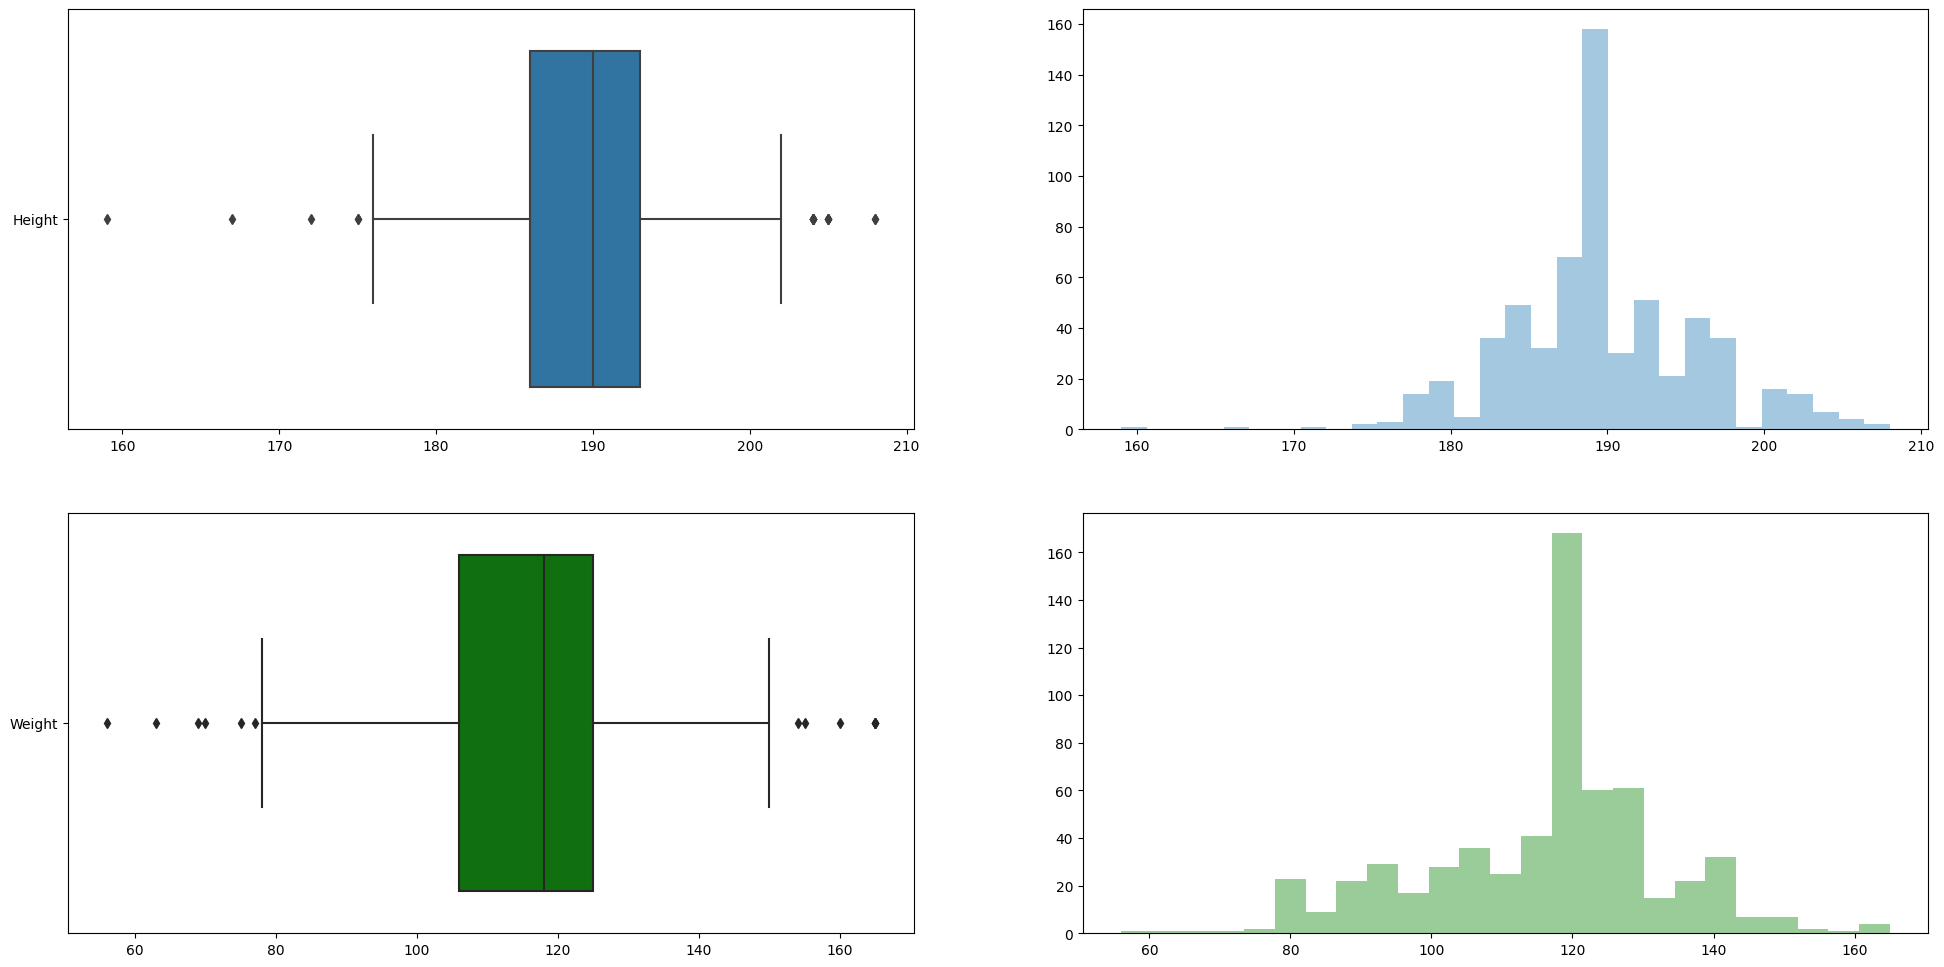

In [ ]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 2, figsize=(24, 12))

# Plot the basic uni-variate figures for spHeight_train
sns.boxplot(spHeight_train, orient = "h", ax = axes[0,0])
sns.distplot(spHeight_train, kde = False, ax = axes[0,1])

# Plot the basic uni-variate figures for spWeight_train
sns.boxplot(spWeight_train, orient = "h", ax = axes[1,0], color = 'g')
sns.distplot(spWeight_train, kde = False, ax = axes[1,1], color = 'g')

<Axes: >

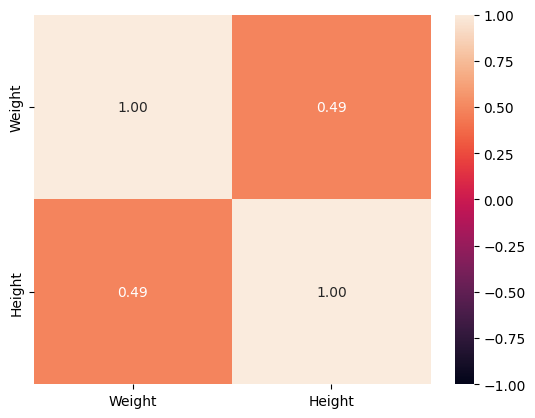

In [ ]:

# Create a joint dataframe by concatenating the two variables
spJointDF = pd.concat([spWeight_train, spHeight_train], axis = 1)

# Calculate the correlation between the two columns/variables
sns.heatmap(spJointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
spLinreg = LinearRegression()

In [ ]:
# Train the Linear Regression model
spLinreg.fit(spHeight_train, spWeight_train)


LinearRegression()

The model has been *trained* to fit the following formula.

>  Regression Problem : Weight = $a$ $\times$ Height + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [ ]:
# # Coefficients of the Linear Regression line
# print('Intercept \t: b = ', spLinreg.intercept_)
# print('Coefficients \t: a = ', spLinreg.coef_)

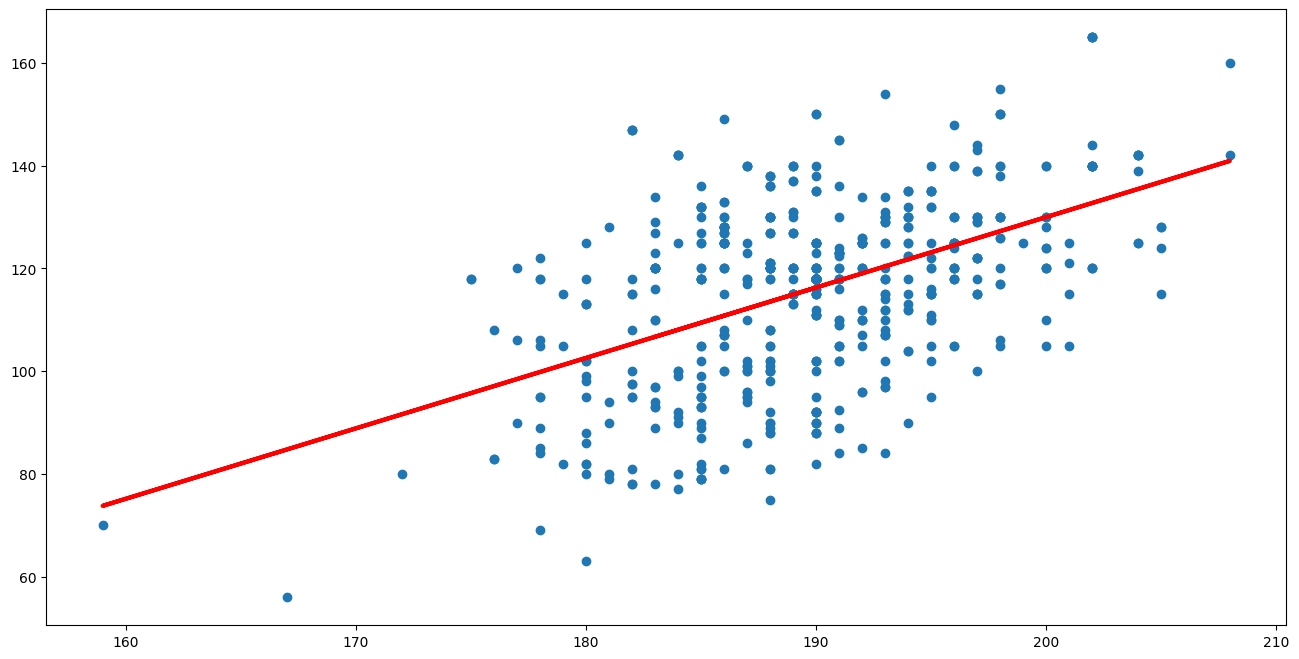

In [ ]:
# Formula for the Regression line
spRegline_x = spHeight_train
spRegline_y = spLinreg.intercept_ + spLinreg.coef_ * spHeight_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(spHeight_train, spWeight_train)
plt.plot(spRegline_x, spRegline_y, 'r-', linewidth = 3)
plt.show()

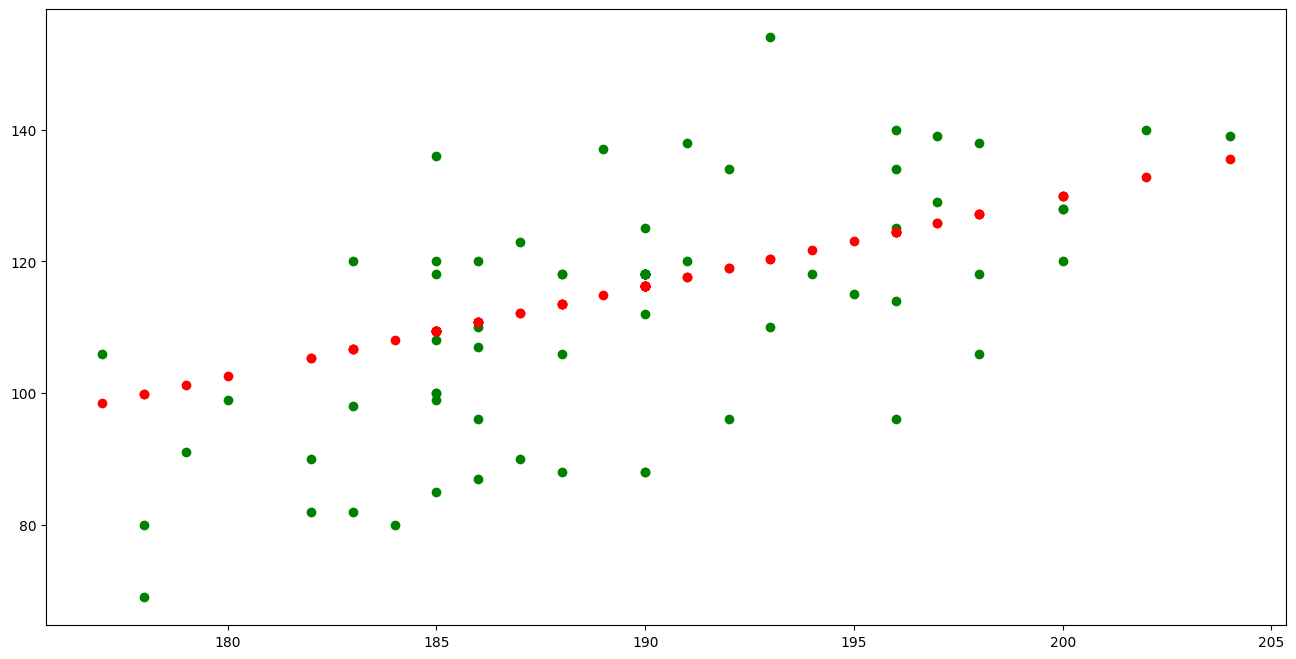

In [ ]:
# Predict Weight values corresponding to Height Test
sp_weight_test_pred = spLinreg.predict(spHeight_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(spHeight_test, spWeight_test, color = "green")
plt.scatter(spHeight_test, sp_weight_test_pred, color = "red")
plt.show()

In [ ]:
# Coefficient of determination (R^2)
print("Coefficient of determination (R^2) \t:", spLinreg.score(spHeight_test, spWeight_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

spmse = mean_sq_err(spWeight_test, sp_weight_test_pred)
print("Mean Squared Error (MSE) \t:", spmse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(spmse))

Coefficient of determination (R^2) 	: 0.33370764762636074
Mean Squared Error (MSE) 	: 216.36098292232091
Root Mean Squared Error (RMSE) 	: 14.70921421838437
